## Imports

In [148]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd

## Utils import

In [149]:
from utils import load_data2, encode_attributs_category, convert_to_tensor, pre_processing

## Préparation des données

In [150]:
# Load
train_data, test_data = load_data2()

# Suppresion des lignes avc valeurs manquantes
X_train, y_train, X_test, y_test = pre_processing(train_data, test_data)

# conversion des données catégorielles en numériques (one_hot_encoding)
X_train, y_train, X_test, y_test = encode_attributs_category(X_train, y_train, X_test, y_test)

X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor = convert_to_tensor(X_train, y_train, X_test, y_test)

In [151]:
print(X_train_tensor.shape)
print(X_test_tensor.shape)

torch.Size([21115, 13])
torch.Size([9047, 13])


## Model

In [152]:
model = torch.nn.Sequential(
    torch.nn.Linear(X_train_tensor.shape[1], 8), # ! 13
    torch.nn.ReLU(),
    torch.nn.Linear(8, 2)
)

## Fonction de perte

In [153]:
loss_fn = torch.nn.CrossEntropyLoss()

lr = 1e-5 # Learning rate

optimizer = torch.optim.SGD(model.parameters(), lr=lr)

Données d'entrainement
Iteration [1/50], Loss: 13870.8887
Iteration [2/50], Loss: 18448.5684
Iteration [3/50], Loss: 14135.6406
Iteration [4/50], Loss: 77535.9609
Iteration [5/50], Loss: 0.6437
Iteration [6/50], Loss: 0.6427
Iteration [7/50], Loss: 0.6416
Iteration [8/50], Loss: 0.6403
Iteration [9/50], Loss: 0.6388
Iteration [10/50], Loss: 0.6371
Iteration [20/50], Loss: 0.6198
Iteration [30/50], Loss: 0.6091
Iteration [40/50], Loss: 0.6065
Iteration [50/50], Loss: 0.6063


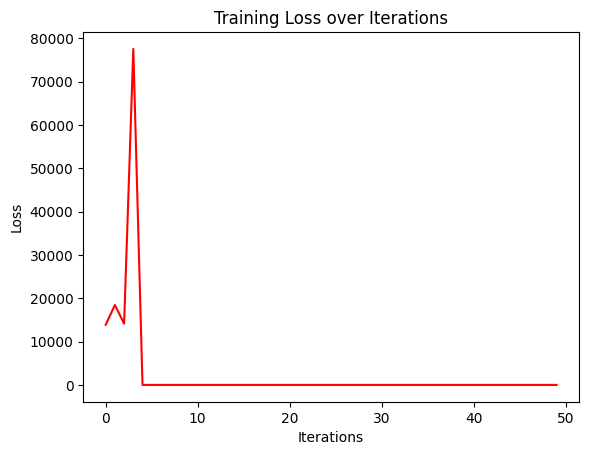

Données de test
Iteration [1/50], Loss: 0.7940
Iteration [2/50], Loss: 0.7965
Iteration [3/50], Loss: 0.7980
Iteration [4/50], Loss: 0.7984
Iteration [5/50], Loss: 0.7978
Iteration [6/50], Loss: 0.7961
Iteration [7/50], Loss: 0.7933
Iteration [8/50], Loss: 0.7895
Iteration [9/50], Loss: 0.7844
Iteration [10/50], Loss: 0.7783
Iteration [20/50], Loss: 0.6978
Iteration [30/50], Loss: 0.6024
Iteration [40/50], Loss: 0.5072
Iteration [50/50], Loss: 0.4901


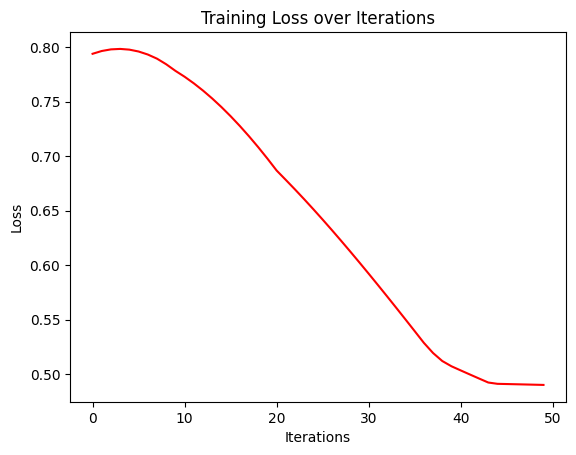

In [154]:
def compute(X_train, y_train, iterations=50):

    errors = []

    for iteration in range(iterations):
        y_pred = model(X_train)
        error = loss_fn(y_pred, y_train)
        error.backward()    
        optimizer.step()

        errors.append(error.item())

        if iteration < 10 or (iteration + 1) % 10 == 0:
            print(f'Iteration [{iteration+1}/{iterations}], Loss: {error.item():.4f}')

    plt.plot(range(iterations), errors, 'r-')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Training Loss over Iterations')
    plt.show()

print('Données d\'entrainement')
compute(X_train_tensor, y_train_tensor, 50)
print('Données de test')
compute(X_test_tensor, y_test_tensor, 50)